In [11]:
import numpy as np
from scipy.interpolate import interp1d
import corner
from myml import mymetropolis
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def lnp(x):
    if -10 < x < 10:
        return np.log(1/20)
    else:
        return -np.inf


def lnl(x):
    mean = 2
    sigma = 2
    return (-0.5*(((x - mean)/sigma)**2) - np.log(sigma*np.sqrt(2*np.pi)))


sampler = mymetropolis(1, 10, lnp, lnl)
sampler.set_initial(np.random.rand(10, 1))
sampler.set_q(np.array([1]))
s, c = sampler.step(1000)
s, c = sampler.step(10000)

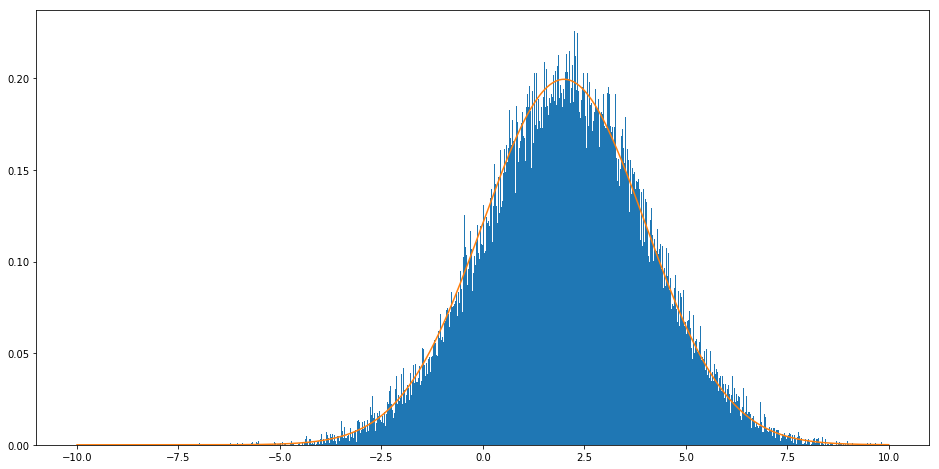

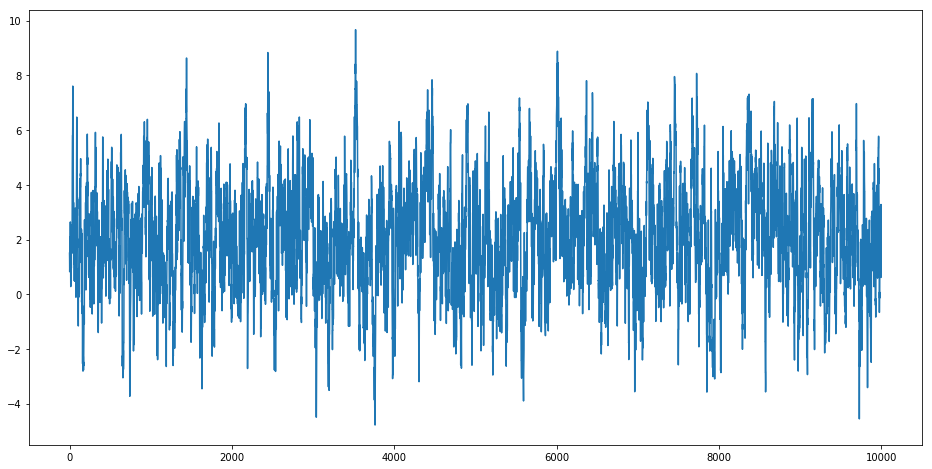

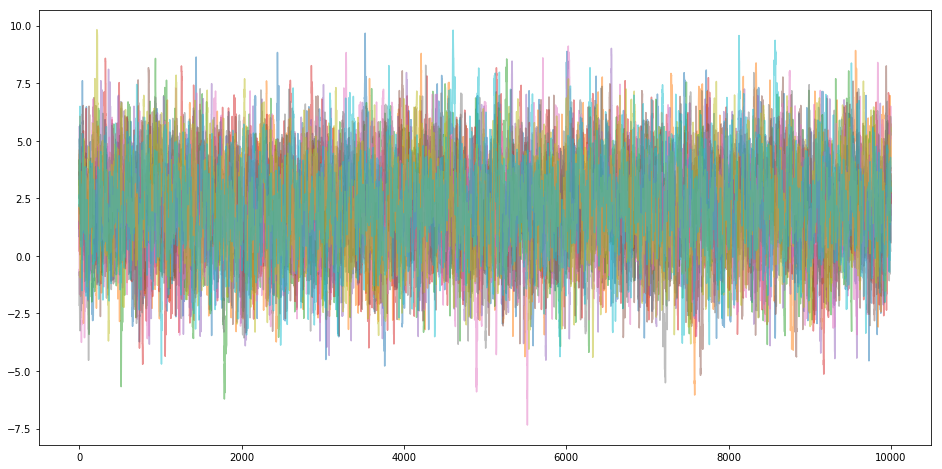

In [13]:
plt.figure(figsize=[16, 8])
_, _, _ = plt.hist(s, bins=1000, density=True)
plt.plot(np.linspace(-10, 10, num=1000), np.exp(lnl(np.linspace(-10, 10, num=1000))))
plt.figure(figsize=[16, 8])
plt.plot(c[:, 0, 0])
plt.figure(figsize=[16, 8])
for i in range(c.shape[1]):
    plt.plot(c[:, i, 0], alpha=0.5)

In [14]:
sampler2 = mymetropolis(1, 10, lnp, lnl)
sampler2.set_initial(np.random.rand(10, 1))
sampler2.set_q(np.array([0.2]))
s2, c2 = sampler2.step(1000)
s2, c2 = sampler2.step(10000)

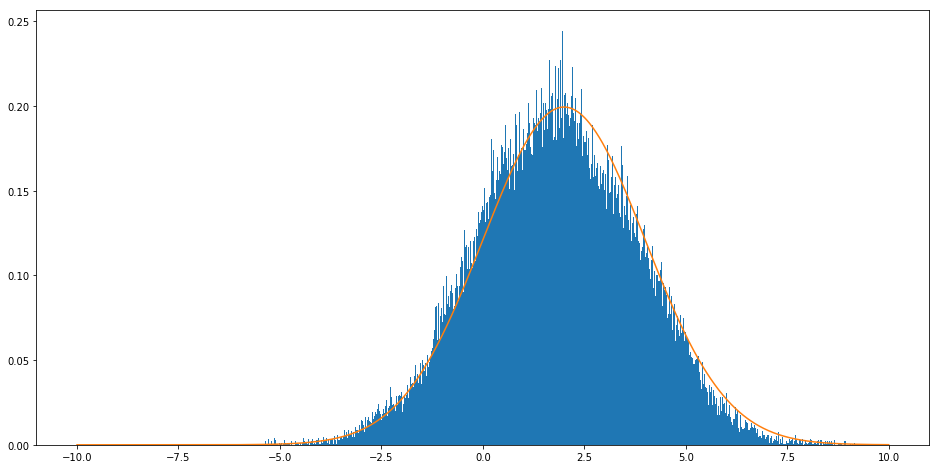

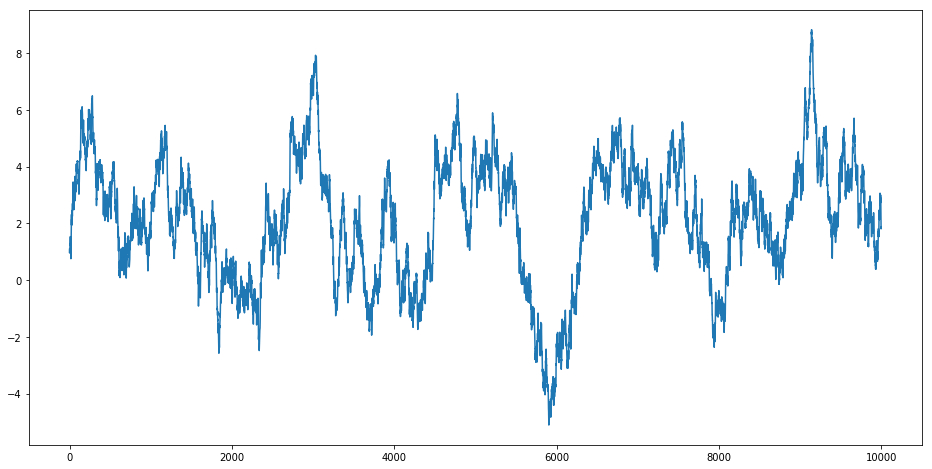

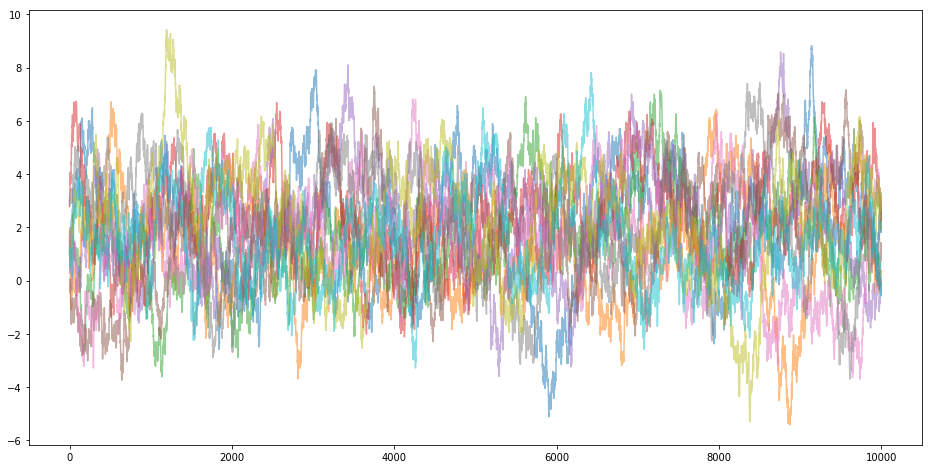

In [15]:
plt.figure(figsize=[16, 8])
_, _, _ = plt.hist(s2, bins=1000, density=True)
plt.plot(np.linspace(-10, 10, num=1000), np.exp(lnl(np.linspace(-10, 10, num=1000))))
plt.figure(figsize=[16, 8])
plt.plot(c2[:, 0, 0])
plt.figure(figsize=[16, 8])
for i in range(c2.shape[1]):
    plt.plot(c2[:, i, 0], alpha=0.5)

In [16]:
sampler3 = mymetropolis(1, 10, lnp, lnl)
sampler3.set_initial(np.random.rand(10, 1) + 9)
sampler3.set_q(np.array([1]))
s3, c3 = sampler3.step(1000)
s3, c3 = sampler3.step(10000)

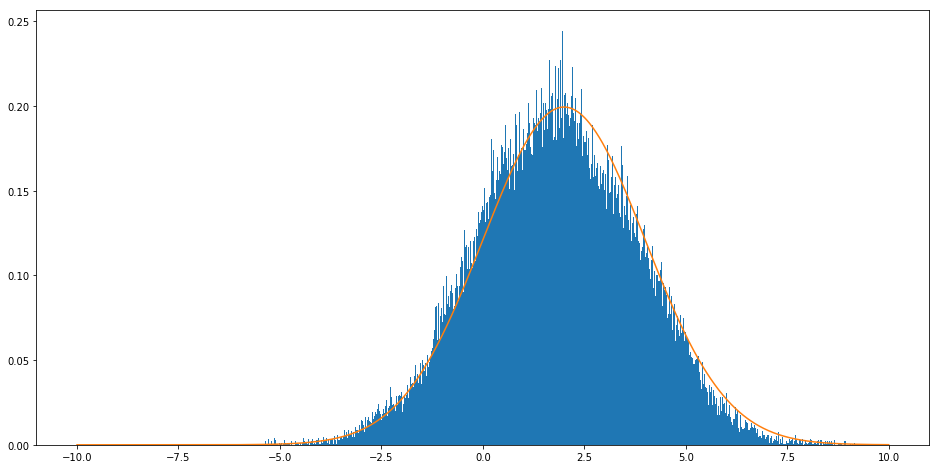

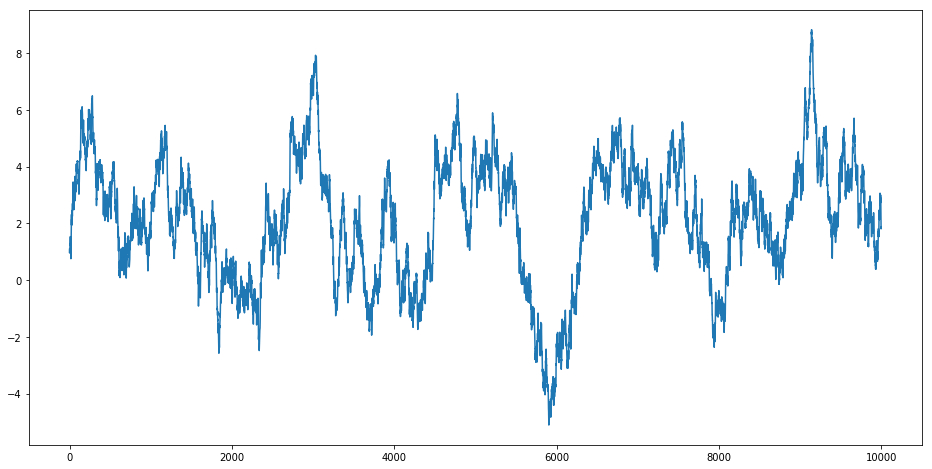

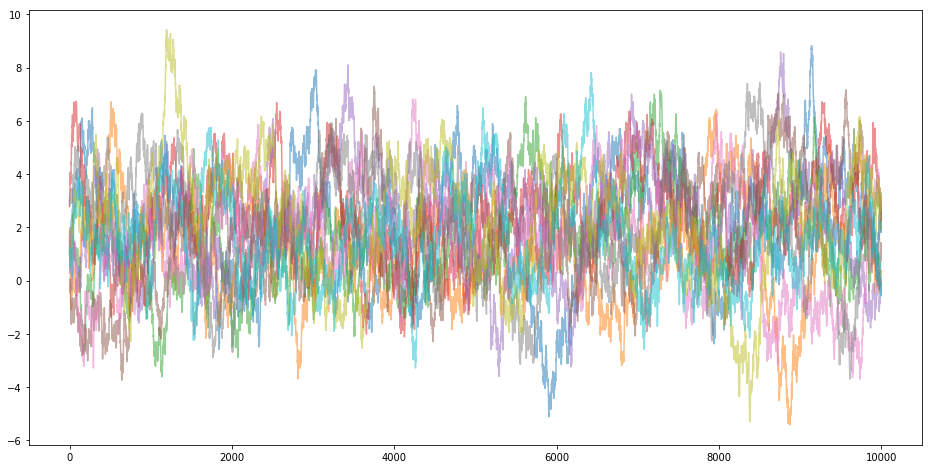

In [17]:
plt.figure(figsize=[16, 8])
_, _, _ = plt.hist(s2, bins=1000, density=True)
plt.plot(np.linspace(-10, 10, num=1000), np.exp(lnl(np.linspace(-10, 10, num=1000))))
plt.figure(figsize=[16, 8])
plt.plot(c2[:, 0, 0])
plt.figure(figsize=[16, 8])
for i in range(c2.shape[1]):
    plt.plot(c2[:, i, 0], alpha=0.5)

In [18]:
class lnmn:
    
    def __init__(self, m, c):
        self.m = m
        self.c = c
        self.ic = np.linalg.inv(c)
        self.dc = np.linalg.det(c)
    
    def __call__(self, x):
        return -0.5*(x-self.m).T@self.ic@(x-self.m) - np.log((2*np.pi*np.sqrt(self.dc)))


lng = lnmn(np.array([0, 0]), np.array([[2, 1.2], [1.2, 2]]))


def lnl(x):
    return lng(x)


def lnp(x):
    if -10 < x[0] < 10 and -10 < x[1] < 10:
        return np.log(1/20/20)
    else:
        return -np.inf

initial = np.zeros((10, 2))
initial[0, :] += 3
initial[1, :] += -3
sampler4 = mymetropolis(2, 10, lnp, lnl)
sampler4.set_initial(initial)
sampler4.set_q(np.array([[2, 1.2], [1.2, 2]]))
#s4, c4 = sampler4.step(1000)
s4, c4 = sampler4.step(10000)

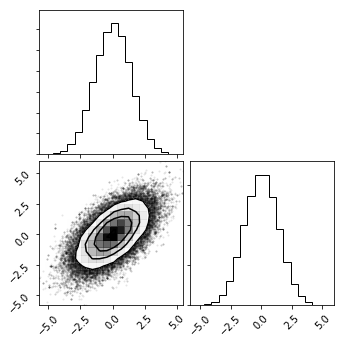

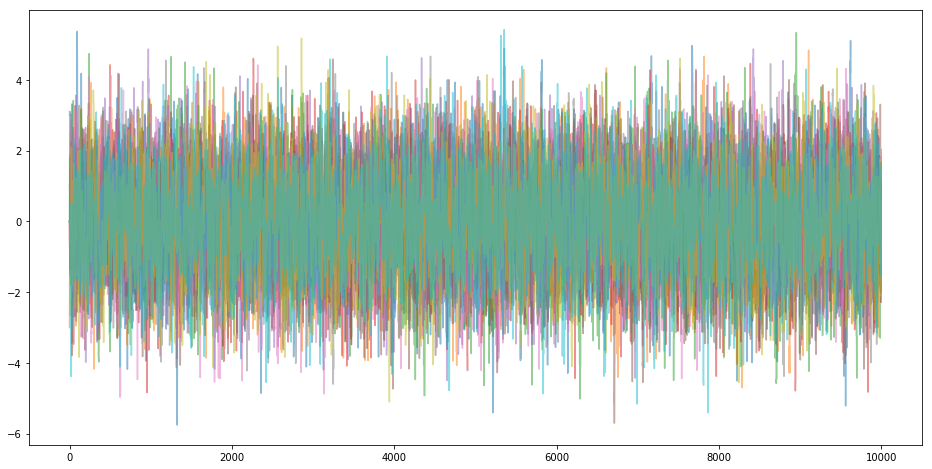

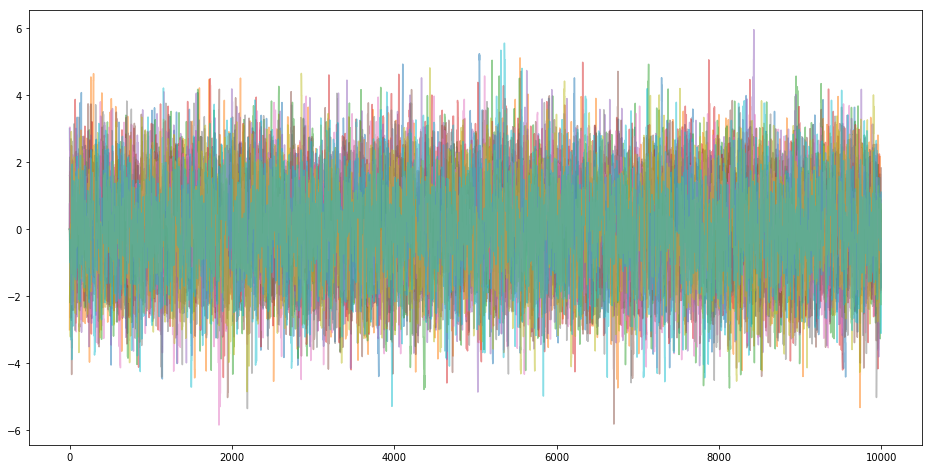

In [19]:
corner.corner(s4)
plt.figure(figsize=[16, 8])
for i in range(10):
    plt.plot(c4[:, i, 0], alpha=0.5)
plt.figure(figsize=[16, 8])
for i in range(10):
    plt.plot(c4[:, i, 1], alpha=0.5)

In [25]:
class lnmn:
    
    def __init__(self, m, c):
        self.m = m
        self.c = c
        self.ic = np.linalg.inv(c)
        self.dc = np.linalg.det(c)
    
    def __call__(self, x):
        return -0.5*(x-self.m).T@self.ic@(x-self.m) - np.log((2*np.pi*np.sqrt(self.dc)))


lng = lnmn(np.array([0, 0]), np.array([[2, 1.2], [1.2, 2]]))


def lnl(x):
    return lng(x)


def lnp(x):
    if 0 < x[0] < 10 and -10 < x[1] < 10:
        return np.log(1/20/20)
    else:
        return -np.inf

initial = np.zeros((10, 2))
initial[0, :] += 3
initial[1, :] += -3
sampler4b = mymetropolis(2, 10, lnp, lnl)
sampler4b.set_initial(initial)
sampler4b.set_q(np.array([[2, 1.2], [1.2, 2]]))
s4b, c4b = sampler4b.step(1000)
s4b, c4b = sampler4b.step(10000)

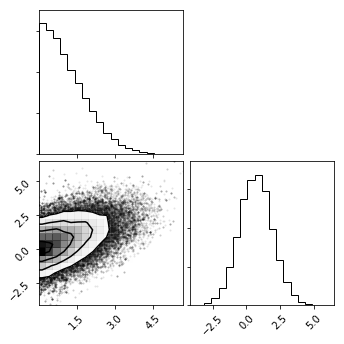

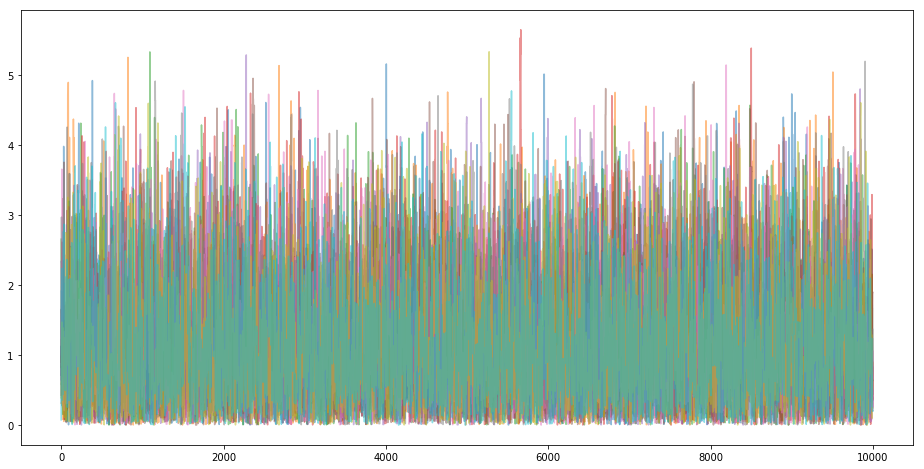

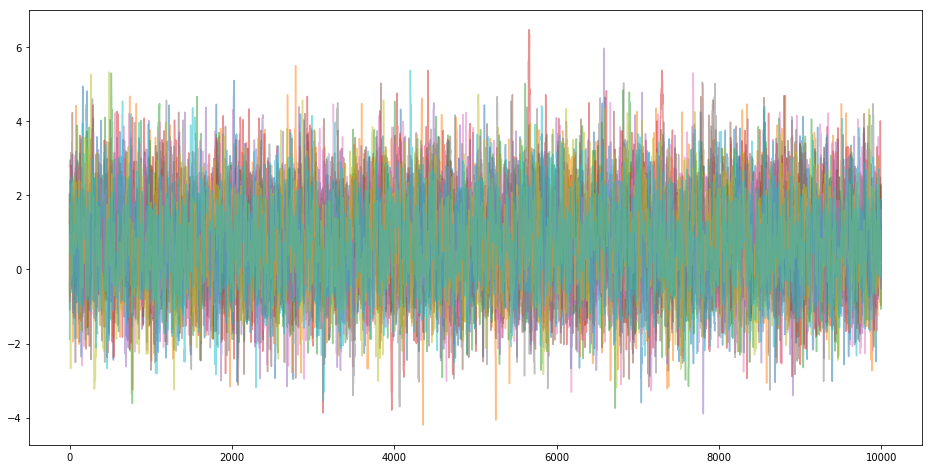

In [26]:
corner.corner(s4b)
plt.figure(figsize=[16, 8])
for i in range(10):
    plt.plot(c4b[:, i, 0], alpha=0.5)
plt.figure(figsize=[16, 8])
for i in range(10):
    plt.plot(c4b[:, i, 1], alpha=0.5)

In [31]:
class lnmn:
    
    def __init__(self, m, c):
        self.m = m
        self.c = c
        self.ic = np.linalg.inv(c)
        self.dc = np.linalg.det(c)
    
    def __call__(self, x):
        return -0.5*(x-self.m).T@self.ic@(x-self.m) - np.log((2*np.pi*np.sqrt(self.dc)))


lng = lnmn(np.array([0, 0, 0]), np.array([[4, 1, 0], [1, 1, 0], [0, 0, 0.2]]))


def lnl(x):
    return lng(x)


def lnp(x):
    if -10 < x[0] < 10 and -10 < x[1] < 10 and -10 < x[2] < 10:
        return np.log(1/20/20/20)
    else:
        return -np.inf

initial = np.zeros((10, 3))
initial[0, :] += 3
initial[1, :] += -3
initial[2, :] += 2
sampler5 = mymetropolis(3, 10, lnp, lnl)
sampler5.set_initial(initial)
sampler5.set_q(np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]))
s5, c5 = sampler5.step(1000)
s5, c5 = sampler5.step(10000)

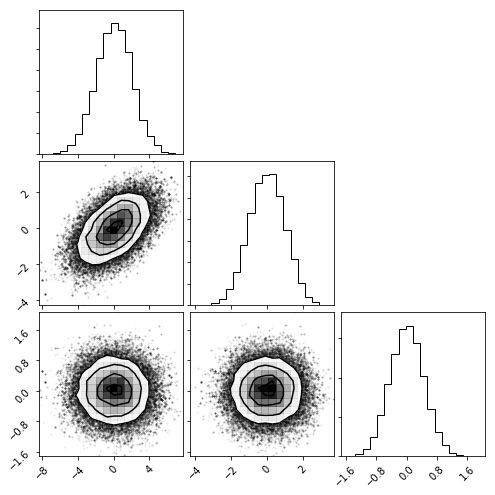

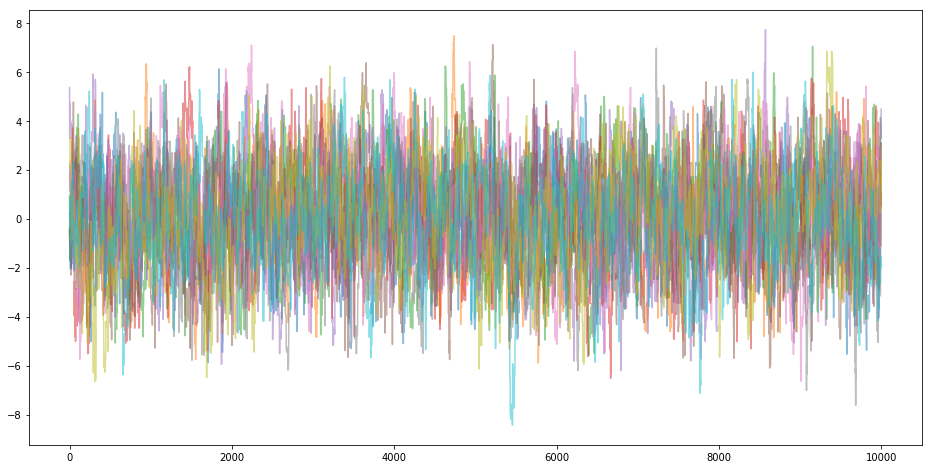

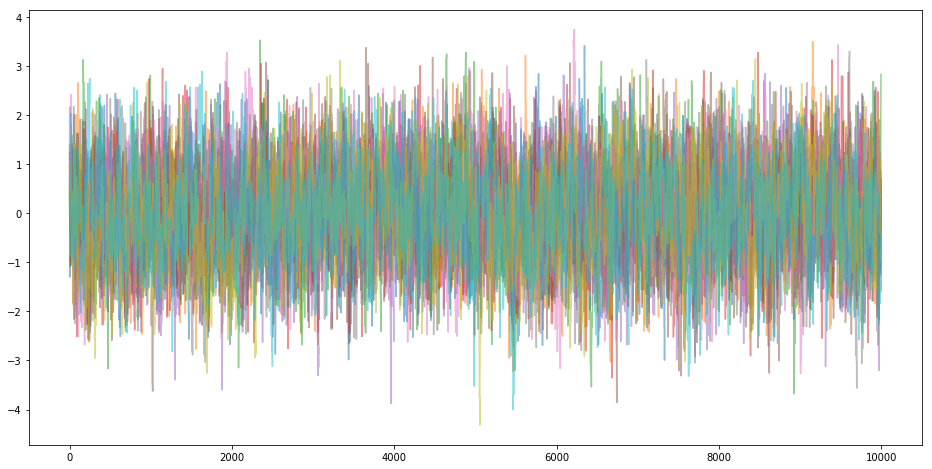

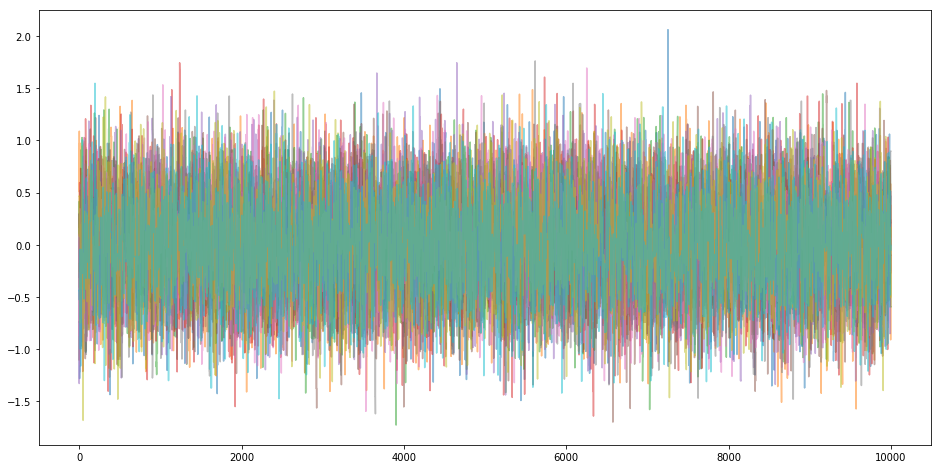

In [32]:
corner.corner(s5)
plt.figure(figsize=[16, 8])
for i in range(10):
    plt.plot(c5[:, i, 0], alpha=0.5)
plt.figure(figsize=[16, 8])
for i in range(10):
    plt.plot(c5[:, i, 1], alpha=0.5)
plt.figure(figsize=[16, 8])
for i in range(10):
    plt.plot(c5[:, i, 2], alpha=0.5)